## 0. Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) # Display max columns without limitation 
pd.set_option('display.max_rows', 500) # Display max rows of 500
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Datapreprocessing
DEBUG = 0 # Enable debug to validate pre-processing steps
LOG_NUNIQUE = 50 # Applay Log when umber of unique values > LOG_NUNIQUE; Default = 50
KEEP_MOST_USED_OBJECTS = 5 # Keep the most used objects per column; Default = 5 -> 3 * 5 Columns kept 

# Training and Evaluation
TRAIN_DATA_FROM_SCRATCH = False

## 1. EDA

In [4]:
df_train = pd.read_csv('./data/UNSW_NB15_training-set.csv')
df_test = pd.read_csv('./data/UNSW_NB15_testing-set.csv')
df_old = df_train.copy()

In [5]:
df_train = pd.concat([df_train, df_test])

In [6]:
df_train.shape

(257673, 45)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [8]:
df_train.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,10112.025390,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,252,6039.783203,3892.583740,2,1,68.267778,81.137711,4286.828570,119.422719,255,1787309226,1767180493,255,0.143337,0.069136,0.074201,53,44,0,0,43,1,1,1,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,252,7377.527344,4754.747070,2,1,55.794000,66.054141,3770.580726,118.962633,255,205985702,316006300,255,0.116615,0.059195,0.057420,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,252,7087.796387,4568.018555,2,1,60.210889,68.109000,4060.625597,106.611547,255,884094874,3410317203,255,0.118584,0.066133,0.052451,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,252,14875.120120,6927.291016,2,1,27.505111,39.106801,1413.686415,57.200395,255,3368447996,584859215,255,0.087934,0.063116,0.024818,53,45,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0


In [9]:
df_train.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,

In [10]:
# Overview of all the unique features withihn the dataset
mixed_types = df_train.apply(lambda x: any(isinstance(val, str) for val in x))

for column, is_mixed_type in mixed_types.items():
    if is_mixed_type:
        mixed_values = df_train.loc[df_train[column].apply(lambda x: isinstance(x, str)), column].unique()
        print(f"Column '{column}' contains mixed types: {mixed_values}")

Column 'proto' contains mixed types: ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xn

<Axes: xlabel='label', ylabel='Count'>

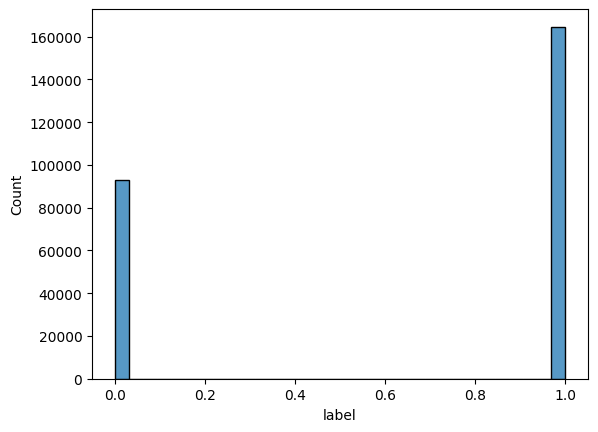

In [11]:
sns.histplot(x = df_train.label)

## 2. Pre-processing 

In [12]:
list_drop = ['id','attack_cat']
df_train.drop(list_drop, axis=1, inplace=True)
#df_test.drop(list_drop, axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt  

### 2.1 Nummeric feature analysis

In [13]:
df_numeric_train = df_train.select_dtypes(include=[np.number])
#df_nummeric_test = df_test.select_dtypes(include=[np.number])
df_numeric_train.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
def clamp_extreme_values(df, debug=False):
    """
    Clamp extreme values in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - debug (bool): If True, print debug information.

    Returns:
    - pd.DataFrame: DataFrame with extreme values clamped.
    """
    df_numeric = df.select_dtypes(include=[np.number])
    for feature in df_numeric.columns:
        if debug:
            print("Column:", feature)
            print('Max value = ' + str(df_numeric[feature].max()))
            print('(Q2) Median = ' + str(df_numeric[feature].median()))
            print('(Q3) 75th percentile = ' + str(df_numeric[feature].quantile(0.95)))
            print("Max > 10 * Median =", df_numeric[feature].max() > 10 * df_numeric[feature].median())
            print('----------------------------------------------------')

        if df_numeric[feature].max() > 10 * df_numeric[feature].median() and df_numeric[feature].max() > 10:
            df[feature] = np.where(df[feature] < df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

    return df

In [15]:
def apply_log_scaling(df, log_nunique=50, debug=False):
    """
    Apply log-scaling to selected numeric features in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - log_nunique (int): Threshold for the number of unique values.
    - debug (bool): If True, print debug information.

    Returns:
    - pd.DataFrame: DataFrame with log-scaled features.
    """

    df_numeric = df.select_dtypes(include=[np.number])

    for feature in df_numeric.columns:
        if debug:
            print("Column:", feature)
            print('Unique elements = ' + str(df_numeric[feature].nunique()))
            print("Unique elements > {log} = {values}".format(log=log_nunique, values=df_numeric[feature].nunique() > log_nunique))
            print('----------------------------------------------------')

        if df_numeric[feature].nunique() > log_nunique:
            if df_numeric[feature].min() == 0:
                df[feature] = np.log(df[feature] + 1)
            else:
                df[feature] = np.log(df[feature])

    return df


In [16]:
def keep_most_used_objects(df, keep_threshold=5, debug=False):
    """
    Keep only the most used objects in categorical features of a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - keep_threshold (int): Threshold for the number of unique values to keep.
    - debug (bool): If True, print debug information.

    Returns:
    - pd.DataFrame: DataFrame with selected categorical features.
    """

    df_cat = df.select_dtypes(exclude=[np.number])

    for feature in df_cat.columns:
        if debug:
            print(feature)
            print('nunique = ' + str(df_cat[feature].nunique()))
            print(df_cat[feature].nunique() >= keep_threshold)
            print(sum(df[feature].isin(df[feature].value_counts().head().index)))
            print('----------------------------------------------------')

        if df_cat[feature].nunique() >= keep_threshold:
            most_used_values = df[feature].value_counts().head().index
            df[feature] = np.where(df[feature].isin(most_used_values), df[feature], '-')

    return df

In [17]:
df_clamped_train = clamp_extreme_values(df_train, DEBUG)
#df_clamped_test = clamp_extreme_values(df_test, DEBUG)

In [18]:
df_log_train = apply_log_scaling(df_clamped_train, LOG_NUNIQUE, DEBUG)
#df_log_test = apply_log_scaling(df_clamped_test, LOG_NUNIQUE, DEBUG)

### 2.2 Object feature analysis

In [19]:
df_cat_train = df_log_train.select_dtypes(exclude=[np.number])
#df_cat_test = df_log_test.select_dtypes(exclude=[np.number])

df_cat_train.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [20]:
df_train = keep_most_used_objects(df_log_train, KEEP_MOST_USED_OBJECTS, DEBUG)
#df_test = keep_most_used_objects(df_log_test, KEEP_MOST_USED_OBJECTS, DEBUG)

In [21]:
df_cat_train = df_train.select_dtypes(exclude=[np.number])
#df_cat_test = df_test.select_dtypes(exclude=[np.number])
df_cat_train.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [22]:
df_train[['proto', 'service', 'state']].value_counts()

proto  service   state
tcp    -         FIN      77905
udp    dns       INT      57692
tcp    http      FIN      26972
udp    -         INT      18607
-      -         INT      18551
unas   -         INT      15599
udp    dns       CON      10675
tcp    smtp      FIN       6844
       ftp-data  FIN       5383
udp    -         CON       5382
arp    -         INT       3695
tcp    -         CON       3170
                 REQ       2511
ospf   -         INT       2294
                 REQ        977
-      -         CON        649
udp    dns       REQ        234
arp    -         CON        151
udp    -         REQ        111
tcp    -         RST         80
       smtp      CON         64
       dns       FIN         60
       http      CON         36
-      -         -           15
tcp    ftp-data  CON          7
       -         -            4
       http      RST          3
       smtp      RST          1
       ftp-data  -            1
Name: count, dtype: int64

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  float64
 5   dpkts              257673 non-null  float64
 6   sbytes             257673 non-null  float64
 7   dbytes             257673 non-null  float64
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  float64
 14  dloss              257673 non-null  float64
 15  sinpkt             257673 non-null  float64
 16  dinpkt  

In [24]:
df_numeric_train = df_train.select_dtypes(include=[np.number])
#df_numeric_test = df_test.select_dtypes(include=[np.number])
df_numeric_train.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,0.279701,1.752784,1.367635,6.230272,3.823273,7.719155,180.000931,84.754957,13.782463,5.649463,2.180974,2.956693,1.799721,1.596932,3.564474,2.252746,121.753661,9.906846,9.903646,119.254629,0.041886,0.022283,0.021281,4.486114,2.533020,0.098660,0.327130,9.114517,1.324978,5.658528,4.861627,3.879448,8.051511,0.012819,0.012850,0.098652,6.382822,8.857366,0.014274,0.639077
std,0.404365,1.196432,1.435571,1.474944,3.798091,4.116677,102.488268,112.762131,4.582378,5.659006,3.265256,6.008834,2.091078,2.045817,3.856609,2.719011,127.367443,10.588147,10.586260,127.230477,0.075568,0.044684,0.040134,0.673732,2.479525,0.298205,1.234621,10.058965,0.992300,6.866560,6.864614,5.367192,10.333915,0.116091,0.116421,0.298195,7.084512,10.116552,0.118618,0.480269
min,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,0.693147,0.000000,4.736198,0.000000,3.459129,62.000000,0.000000,9.418898,0.000000,0.000000,0.000000,0.007968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.043051,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004276,1.386294,1.098612,6.269096,5.187386,7.991817,254.000000,29.000000,13.519720,7.466480,0.000000,0.000000,0.323312,0.006976,0.514999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.290459,3.806662,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.522227,2.484907,2.397895,7.216709,6.970730,11.736077,254.000000,252.000000,18.197537,10.003622,3.000000,2.000000,4.079142,4.050721,7.933212,4.793415,255.000000,21.420094,21.412782,255.000000,0.078887,0.036180,0.043696,4.605170,4.499810,0.000000,0.000000,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,1.338000,4.127134,4.143135,9.507032,10.405626,12.716901,255.000000,254.000000,19.401510,15.193128,12.000000,24.000000,5.436469,5.099135,9.162146,7.929434,255.000000,22.067684,22.065875,255.000000,1.573078,1.441442,1.368328,6.458338,6.646910,1.000000,5.075174,34.000000,6.000000,25.000000,25.000000,17.000000,34.000000,4.000000,4.000000,1.000000,25.000000,34.000000,1.000000,1.000000


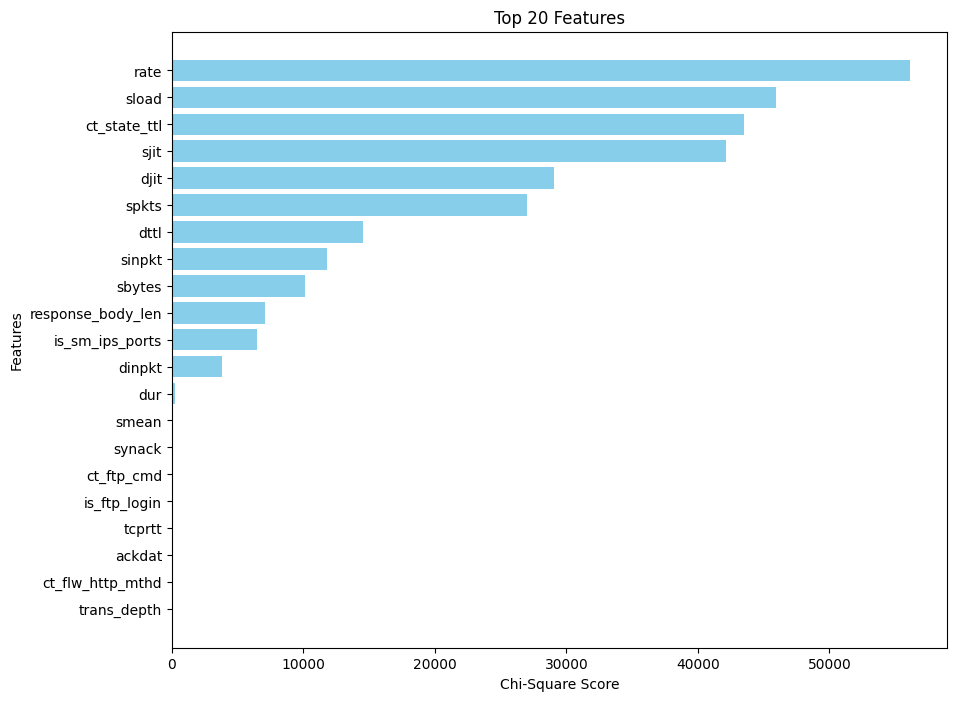

In [25]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k='all')

X = df_numeric_train.iloc[:, :-1]
y = df_numeric_train.iloc[:, -1] # Chi-Square Score for the column "labels" 
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']
feature_score.sort_values(by=['score'], ascending=True, inplace=True)

# Top 20 Features
top_20_features = feature_score[0:21]

plt.figure(figsize=(10, 8))
plt.barh(top_20_features['feature'], top_20_features['score'], color='skyblue')
plt.title('Top 20 Features')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.show()


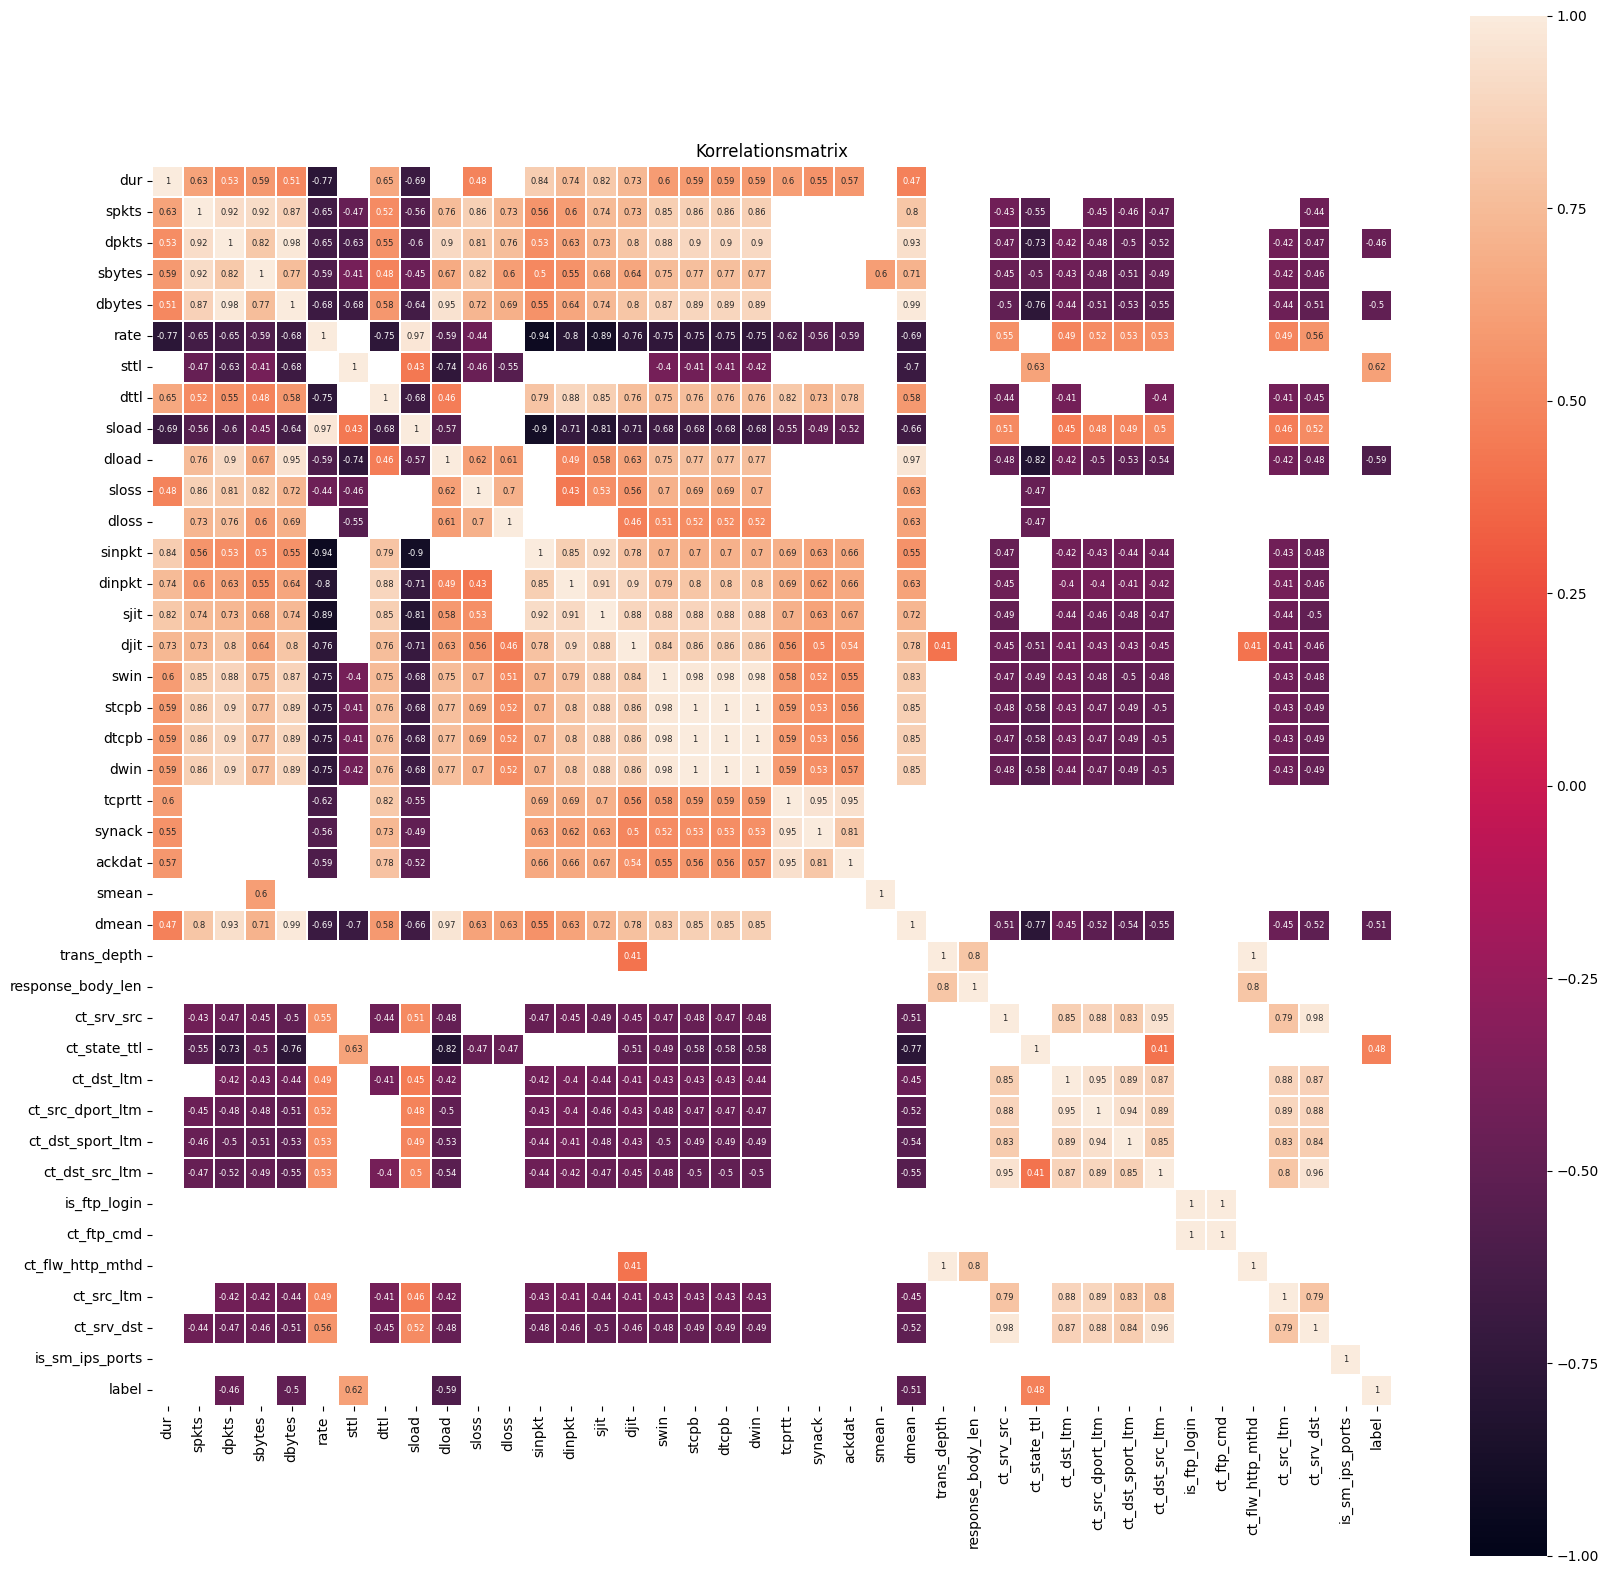

In [26]:
corr_matrix = df_numeric_train.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix[(corr_matrix >= 0.4) | (corr_matrix <= -0.4)], vmax=1.0, 
            vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 6}, square=True)
plt.title('Korrelationsmatrix')
plt.show()

In [27]:
df_num_corr = df_numeric_train.corr(numeric_only=True)['label']
df_num_corr = df_num_corr[df_num_corr >= -1]
print(df_num_corr)

dur                 -0.038107
spkts               -0.358317
dpkts               -0.461601
sbytes              -0.335856
dbytes              -0.497162
rate                 0.314953
sttl                 0.624082
dttl                 0.019369
sload                0.342124
dload               -0.589788
sloss               -0.335394
dloss               -0.340104
sinpkt              -0.137335
dinpkt              -0.075330
sjit                -0.198024
djit                -0.185304
swin                -0.364877
stcpb               -0.338998
dtcpb               -0.338368
dwin                -0.339166
tcprtt              -0.013399
synack              -0.038525
ackdat               0.008813
smean               -0.067186
dmean               -0.513907
trans_depth         -0.001805
response_body_len   -0.076967
ct_srv_src           0.250457
ct_state_ttl         0.476559
ct_dst_ltm           0.247052
ct_src_dport_ltm     0.339795
ct_dst_sport_ltm     0.387176
ct_dst_src_ltm       0.307422
is_ftp_log

In [28]:
golden_features_list = df_num_corr[abs(df_num_corr) > abs(0.4)].sort_values(ascending=False)
print("There are {} strongly correlated values with Target:\n{}".format(len(golden_features_list), golden_features_list))

There are 7 strongly correlated values with Target:
label           1.000000
sttl            0.624082
ct_state_ttl    0.476559
dpkts          -0.461601
dbytes         -0.497162
dmean          -0.513907
dload          -0.589788
Name: label, dtype: float64


## 3. Categorical feature encoding

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [31]:
#X_test = df_test.iloc[:,:-1]
#y_test = df_test.iloc[:,-1]

In [32]:
feature_names = list(X.columns)
np.shape(X)

(257673, 42)

In [33]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#X_test = np.array(ct.fit_transform(X_test))

In [34]:
np.shape(X)

(257673, 56)

In [35]:
len(feature_names)

42

In [36]:
for label in list(df_cat_train['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat_train['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat_train['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [37]:
len(feature_names)

56

## 4. Implementation and modeling

In [38]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [39]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision',
                                          'F1-Score','time to train','time to predict','total time'])

In [40]:
NUMBER_OF_CLASSES = len(feature_names)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y, shuffle=True)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0, stratify=y_train, shuffle=True)

In [42]:
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])
#X_val[:, 18:] = sc.transform(X_val[:, 18:])

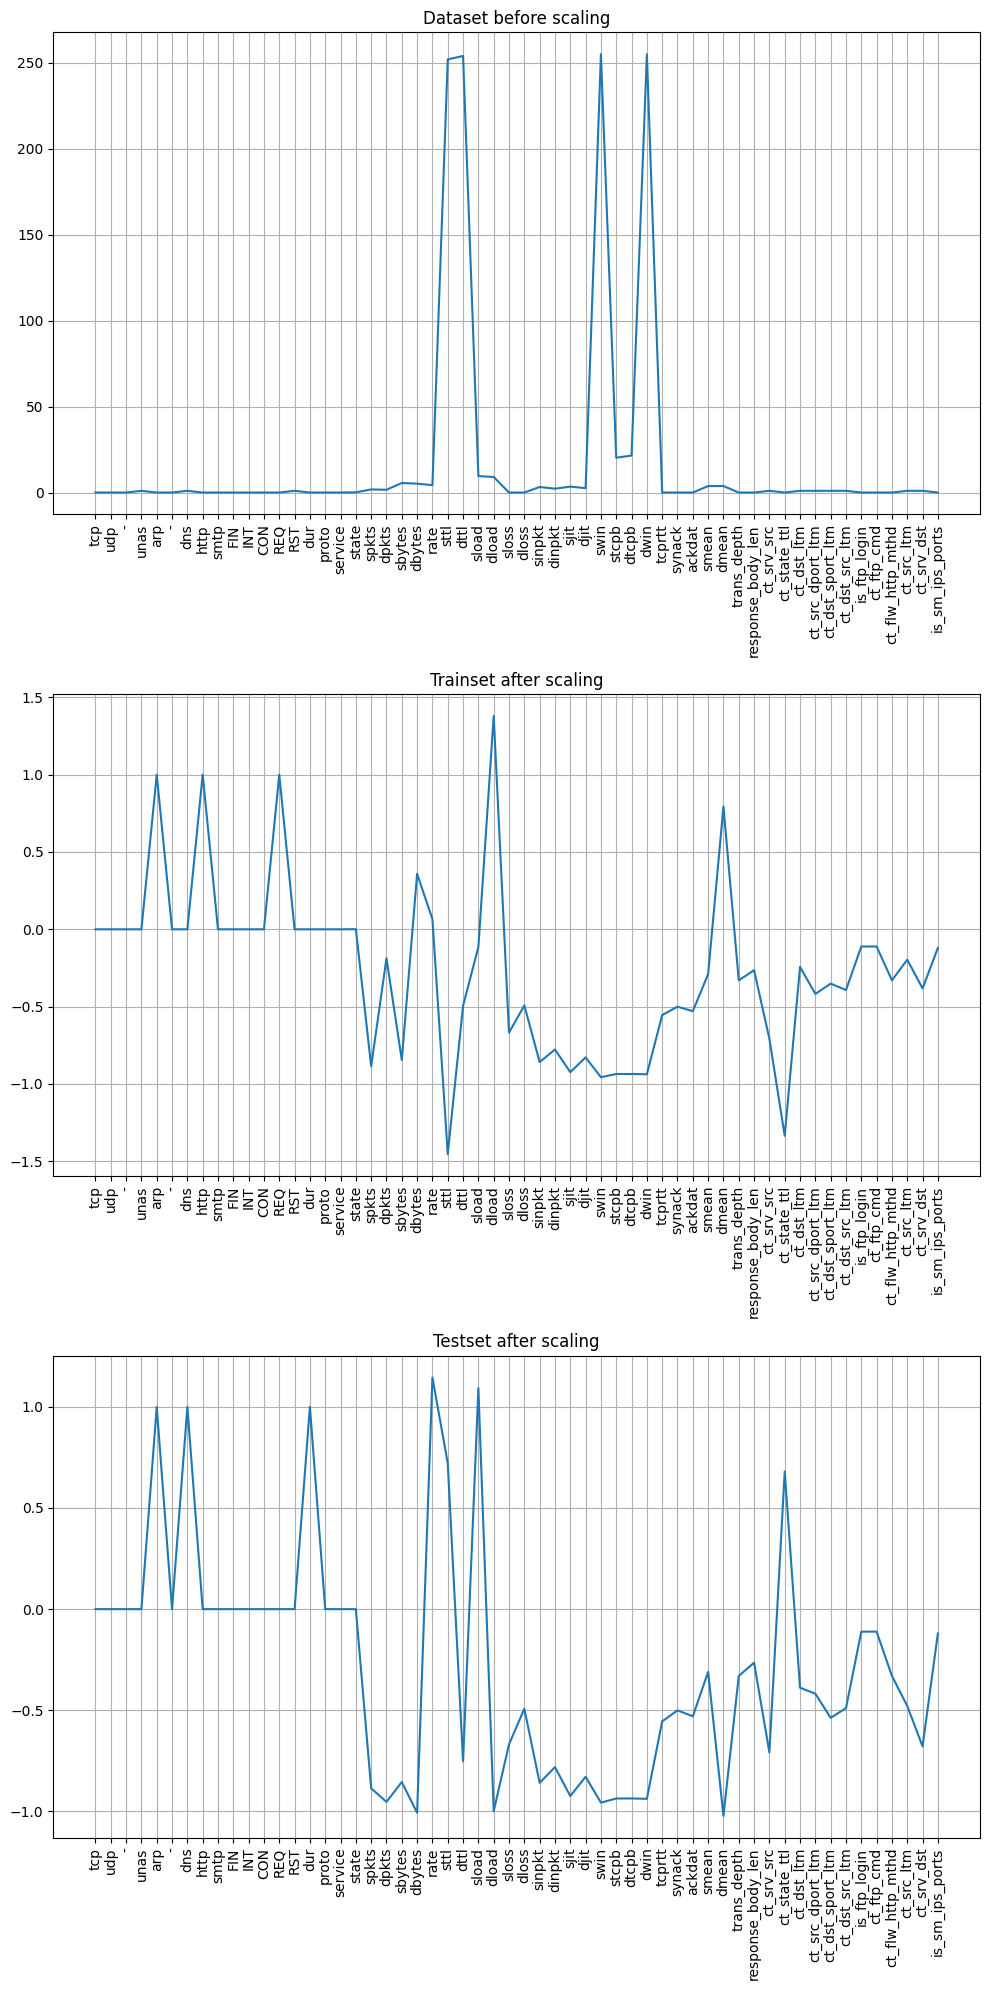

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# Plot für den ersten Subplot (X)
axs[0].plot(np.arange(NUMBER_OF_CLASSES), X[0])
axs[0].set_title("Dataset before scaling")
axs[0].grid()
axs[0].set_xticks(np.arange(NUMBER_OF_CLASSES))
axs[0].set_xticklabels(feature_names, rotation=90)  # Hier wird die Rotation hinzugefügt


# Plot für den zweiten Subplot (X_train)
axs[1].plot(np.arange(NUMBER_OF_CLASSES), X_train[0])
axs[1].set_title("Trainset after scaling")
axs[1].grid()
axs[1].set_xticks(np.arange(NUMBER_OF_CLASSES))
axs[1].set_xticklabels(feature_names, rotation=90)  # Hier wird die Rotation hinzugefügt


# Plot für den dritten Subplot (X_test)
axs[2].plot(np.arange(NUMBER_OF_CLASSES), X_test[0])
axs[2].set_title("Testset after scaling")
axs[2].grid()
axs[2].set_xticks(np.arange(NUMBER_OF_CLASSES))
axs[2].set_xticklabels(feature_names, rotation=90)  # Hier wird die Rotation hinzugefügt

plt.tight_layout()
plt.show()

In [44]:
rdefdfdf

NameError: name 'rdefdfdf' is not defined

### 4.1 Klassification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
start = time.time()
model = LogisticRegression(max_iter=5000).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.35%
Recall: 91.35%
Precision: 91.38%
F1-Score: 91.25%
time to train: 34.59 s
time to predict: 0.01 s
total: 34.60 s


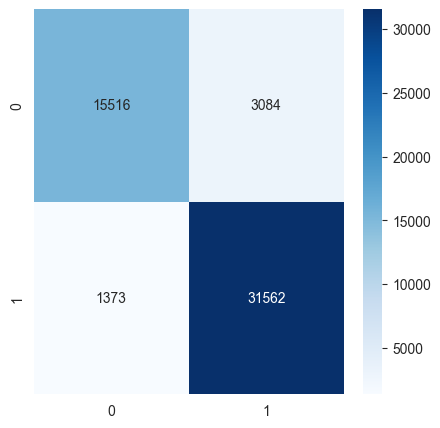

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)  # Setze die Figurgröße
sns.set_style("white")  # Setze das Seaborn-Styling
sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()

In [ ]:
df_train.describe(include='all')

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673,257673,257673,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
unique,NaN,6,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,123041,149701,117164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.279701,NaN,NaN,NaN,1.752784,1.367635,6.230272,3.823273,7.719155,180.000931,84.754957,13.782463,5.649463,2.180974,2.956693,1.799721,1.596932,3.564474,2.252746,121.753661,9.906846,9.903646,119.254629,0.041886,0.022283,0.021281,4.486114,2.533020,0.098660,0.327130,9.114517,1.324978,5.658528,4.861627,3.879448,8.051511,0.012819,0.012850,0.098652,6.382822,8.857366,0.014274,0.639077
std,0.404365,NaN,NaN,NaN,1.196432,1.435571,1.474944,3.798091,4.116677,102.488268,112.762131,4.582378,5.659006,3.265256,6.008834,2.091078,2.045817,3.856609,2.719011,127.367443,10.588147,10.586260,127.230477,0.075568,0.044684,0.040134,0.673732,2.479525,0.298205,1.234621,10.058965,0.992300,6.866560,6.864614,5.367192,10.333915,0.116091,0.116421,0.298195,7.084512,10.116552,0.118618,0.480269
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,3.178054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,NaN,NaN,NaN,0.693147,0.000000,4.736198,0.000000,3.459129,62.000000,0.000000,9.418898,0.000000,0.000000,0.000000,0.007968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.043051,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004276,NaN,NaN,NaN,1.386294,1.098612,6.269096,5.187386,7.991817,254.000000,29.000000,13.519720,7.466480,0.000000,0.000000,0.323312,0.006976,0.514999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.290459,3.806662,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.522227,NaN,NaN,NaN,2.484907,2.397895,7.216709,6.970730,11.736077,254.000000,252.000000,18.197537,10.003622,3.000000,2.000000,4.079142,4.050721,7.933212,4.793415,255.000000,21.420094,21.412782,255.000000,0.078887,0.036180,0.043696,4.605170,4.499810,0.000000,0.000000,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000


In [ ]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.08%
Recall: 93.08%
Precision: 93.11%
F1-Score: 93.09%
time to train: 0.04 s
time to predict: 22.28 s
total: 22.32 s


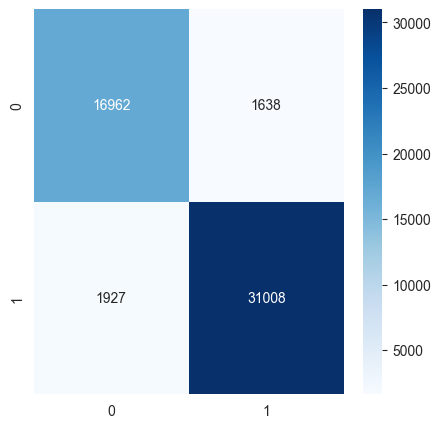

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)  # Setze die Figurgröße
sns.set_style("white")  # Setze das Seaborn-Styling
sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()

In [ ]:
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.64%
Recall: 93.64%
Precision: 93.65%
F1-Score: 93.65%
time to train: 5.98 s
time to predict: 0.01 s
total: 5.99 s


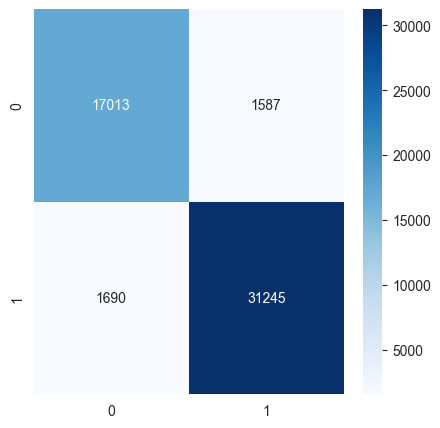

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)  # Setze die Figurgröße
sns.set_style("white")  # Setze das Seaborn-Styling
sns.heatmap(confusion_matrix(y_test, y_predictions), annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()

In [ ]:
if TRAIN_DATA_FROM_SCRATCH:
    # List of models to train
    models = {
        'Logistische Regression' : LogisticRegression(),
        'k-NN': KNeighborsClassifier(),
        'Entscheidungsbaum': DecisionTreeClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'Random Forest': RandomForestClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier()}
    # Parameter to use in grid search
    param_grid = {
        'Logistische Regression': {'max_iter': [5000, 7500], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
        'k-NN': {'n_neighbors': [3, 5, 7], 'leaf_size': [10, 30, 50, 70]},
        'Entscheidungsbaum': {'max_depth': [ 5, 7, 10, 13], 'min_samples_split': [5, 8, 12], 'min_samples_leaf': [3, 5, 7, 15]},
        'Extra Trees': {'n_estimators': [50, 200], 'max_depth': [5, 7, 10, 13]},
        'Random Forest': {'n_estimators': [50, 200], 'max_depth': [5, 7, 10, 13]},
        'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]}
    }

    results = []
    try:
        for model_name, model in models.items():

            grid_search = GridSearchCV(model, param_grid[model_name], cv=3, n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            
            model.set_params(**best_params)
            start_time = time.time()
            model.fit(X_train, y_train)
            training_time = time.time() - start_time
            
            start_time = time.time()
            y_pred = model.predict(X_test)
            prediction_time = time.time() - start_time
            
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            results.append({
                'Modell': model_name,
                'Parameter': best_params,
                'Trainingszeit': training_time,
                'Vorhersagezeit': prediction_time,
                'Genauigkeit': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1 Score': f1,
            })
            print("Trainierte Modelle:", model_name)
        df_results = pd.DataFrame(results)
        df_results.to_csv('./data/df_results_k.csv', index=False)
        
    except Exception as e:
        print(f"Fehler beim Trainieren und Speichern der Ergebnisse: {e}")
        df_results = pd.DataFrame()
else:
    try:
        df_results = pd.read_csv('./data/df_results_k.csv')
        print("Ergebnisse erfolgreich geladen.")
    except FileNotFoundError:
        print("Die Datei df_results_k.csv wurde nicht gefunden.")
        df_results = pd.DataFrame()

Trainierte Modelle: Logistische Regression
Trainierte Modelle: k-NN
Trainierte Modelle: Entscheidungsbaum
Trainierte Modelle: Extra Trees
Trainierte Modelle: Random Forest
Trainierte Modelle: GradientBoostingClassifier


In [ ]:
dfdfdf

In [ ]:
if TRAIN_DATA_FROM_SCRATCH:
    models = {

        'MLP': MLPClassifier(),  # Neuronales Netzwerk (MLP)
        'LSTM': Sequential([
            LSTM(50, input_shape=(1, TOTAL_FEATURES)),
            Dense(1, activation='sigmoid')
        ]),
        'GRU': Sequential([
            GRU(50, input_shape=(1, TOTAL_FEATURES)),
            Dense(1, activation='sigmoid')
        ])
    }

    param_grid = {
        'MLP': {'hidden_layer_sizes': [(50, 50), (100,)], 'activation': ['relu', 'tanh', 'logistic']},
        'LSTM': {'units': [50, 100], 'activation': ['sigmoid', 'tanh'], 'epochs': [10, 20]},
        'GRU': {'units': [50, 100], 'activation': ['sigmoid', 'tanh'], 'epochs': [10, 20]}
    }

    results = []

    try:
        for model_name, model in models.items():
            grid_search = GridSearchCV(model, param_grid[model_name], cv=3, n_jobs=-1)
            if isinstance(model, Sequential):
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                grid_search.fit(X_train_reshaped, y_train)
                best_params = grid_search.best_params_
            else:
            
                grid_search.fit(X_train, y_train)
                best_params = grid_search.best_params_
            
            model.set_params(**best_params)
            if isinstance(model, Sequential): 
                start_time = time.time()
                model.fit(X_train_reshaped, y_train)
                training_time = time.time() - start_time
                start_time = time.time()
                y_pred = model.predict(X_test_reshaped)
                prediction_time = time.time() - start_time
            else:
                start_time = time.time()
                model.fit(X_train, y_train)
                raining_time = time.time() - start_time
                start_time = time.time()
                y_pred = model.predict(X_test)
                prediction_time = time.time() - start_time


            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            results.append({
                'Modell': model_name,
                'Parameter': best_params,
                'Trainingszeit': training_time,
                'Vorhersagezeit': prediction_time,
                'Genauigkeit': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1 Score': f1,
            })
            print("Trainierte Modelle:", model_name)

        df_results = pd.DataFrame(results)
        #df_results.to_csv('./data/df_results_k.csv', index=False)

    except Exception as e:
        print(f"Fehler beim Trainieren und Speichern der Ergebnisse: {e}")
        df_results = pd.DataFrame()
else:
    try:
        df_results = pd.read_csv('./data/df_results_k.csv')
        print("Ergebnisse erfolgreich geladen.")
    except FileNotFoundError:
        print("Die Datei df_results_k.csv wurde nicht gefunden.")
        df_results = pd.DataFrame()


c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Trainierte Modelle: MLP
Fehler beim Trainieren und Speichern der Ergebnisse: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000001E6D5C35FA0> does not.


c:\Users\Alexej\miniconda3\envs\simple-htr-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Modell          6 non-null      object 
 1   Parameter       6 non-null      object 
 2   Trainingszeit   6 non-null      float64
 3   Vorhersagezeit  6 non-null      float64
 4   Genauigkeit     6 non-null      float64
 5   Recall          6 non-null      float64
 6   Precision       6 non-null      float64
 7   F1 Score        6 non-null      float64
dtypes: float64(6), object(2)
memory usage: 512.0+ bytes


### 4.2 Deep-Learning structures 

In [45]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, GRU, Dropout
from keras import layers
import keras 
from numpy import array
import tensorflow as tf

In [46]:
df_results_class = pd.read_csv('./data/df_results_k.csv')
results = []

In [47]:
TRAIN_DATA_FROM_SCRATCH = False
TOTAL_FEATURES = len(feature_names)
EPOCHS = 200
BATCH_SIZE = 1000
LEARNING_RATE = 0.001

In [48]:
# Helper function to calculate the accuracy
def evaluate_model(model, X, y_true, print_output=True):
    y_pred = model.predict(X)
    y_pred_classes = y_pred.argmax(axis=-1)
    
    accuracy = accuracy_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    
    end_predict = time.time()
    
    if print_output:
        print("Modell:",model.name)
        print("Genauigkeit:", accuracy)
        print("Recall:", recall)
        print("Precision:", precision)
        print("F1 Score:", f1)
        
    return accuracy, recall, precision, f1, end_predict

In [108]:
# Helper function to calculate the accuracy for models using timeseries 
def evaluate_model_timeseries(model, X, y_true, print_output=True):

    reconstructions = model.predict(X)
    test_loss = tf.keras.losses.mae(reconstructions, X)
    threshold_test = (np.mean(test_loss) + np.std(test_loss))
    predictions_final = np.where(np.mean((test_loss < threshold_test).numpy().astype(int), axis=1) < 1, 0, 1)
    
    accuracy = accuracy_score(y_true, predictions_final)
    recall = recall_score(y_true, predictions_final, average='weighted')
    precision = precision_score(y_true, predictions_final, average='weighted')
    f1 = f1_score(y_true, predictions_final, average='weighted')
    
    end_predict = time.time()
    
    if print_output:
        print("Modell:",model.name)
        print("Genauigkeit:", accuracy)
        print("Recall:", recall)
        print("Precision:", precision)
        print("F1 Score:", f1)
        
    return accuracy, recall, precision, f1, end_predict

In [49]:
def append_model_reults(model, results, training_time, prediction_time, accuracy, recall, precision, f1):
    
    results.append({
        'Modell': model.name,
        'Parameter': "",
        'Trainingszeit': training_time,
        'Vorhersagezeit': prediction_time,
        'Genauigkeit': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
        })
    return results

In [50]:
#The LSTM and GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and total amount of features.
X_train_array = array(X_train) 
X_test_array  = array(X_test)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0] ,1 ,TOTAL_FEATURES)
X_test_reshaped  = X_test_array.reshape(X_test_array.shape[0] ,1 ,TOTAL_FEATURES) 

### 4.2.1 MLP Classifier

In [ ]:
def build_model_mlp():
    model = Sequential(name="MLP_Classifier")
    model.add(Dense(128, input_dim=TOTAL_FEATURES, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics='accuracy')
    
    return model

In [ ]:
model = build_model_mlp()

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, validation_data=(X_val, y_val))
end_train = time.time()

Epoch 1/200
209/209 - 1s - loss: 0.4006 - accuracy: 0.8668 - val_loss: 0.1682 - val_accuracy: 0.9143 - 1s/epoch - 7ms/step
Epoch 2/200
209/209 - 1s - loss: 0.1620 - accuracy: 0.9160 - val_loss: 0.1555 - val_accuracy: 0.9209 - 683ms/epoch - 3ms/step
Epoch 3/200
209/209 - 1s - loss: 0.1544 - accuracy: 0.9208 - val_loss: 0.1503 - val_accuracy: 0.9242 - 763ms/epoch - 4ms/step
Epoch 4/200
209/209 - 1s - loss: 0.1492 - accuracy: 0.9241 - val_loss: 0.1453 - val_accuracy: 0.9262 - 667ms/epoch - 3ms/step
Epoch 5/200
209/209 - 1s - loss: 0.1454 - accuracy: 0.9270 - val_loss: 0.1470 - val_accuracy: 0.9270 - 676ms/epoch - 3ms/step
Epoch 6/200
209/209 - 1s - loss: 0.1411 - accuracy: 0.9295 - val_loss: 0.1440 - val_accuracy: 0.9262 - 644ms/epoch - 3ms/step
Epoch 7/200
209/209 - 1s - loss: 0.1397 - accuracy: 0.9302 - val_loss: 0.1382 - val_accuracy: 0.9318 - 598ms/epoch - 3ms/step
Epoch 8/200
209/209 - 1s - loss: 0.1393 - accuracy: 0.9305 - val_loss: 0.1370 - val_accuracy: 0.9298 - 633ms/epoch - 3ms/

In [ ]:
accuracy, recall, precision, f1, end_predict = evaluate_model(model, X_test, y_test, True)

   1/1611 [..............................] - ETA: 38s

1611/1611 [==============================] - 2s 1ms/step
Modell: MLP_Classifier
Genauigkeit: 0.9452216939943727
Recall: 0.9452216939943727
Precision: 0.9458816592533312
F1 Score: 0.945409003546821


In [ ]:
results = append_model_reults(model, results, end_train - start, end_predict - end_train, accuracy, recall, precision, f1)

### 4.2.2 LSTM

In [ ]:
# LSTM_1 = 128 X 64 X 32 X 20; 0.2 dropoout on each layer; 1 Dropout-Layer before Dense -> 91 test 93 train
# LSTM_2 = 256 X 128 X 64 X 32 X 20; 0.2 dropoout on each layer; 1 Dropout-Layer before Dense -> 91 test 93 train
# LSTM_3 = 256 X 128 X 64 X 32 X 20; -> Currently the best model -> 94.5 test 96 train
def build_model_lstm():
    model = Sequential(name="LSTM_3")
    
    model.add(LSTM(256, return_sequences=True, input_shape=(1, TOTAL_FEATURES), name="LSTM1"))
    model.add(LSTM(128, return_sequences=True, name="LSTM2"))
    model.add(LSTM(64, return_sequences=True, name="LSTM3"))
    model.add(LSTM(32, return_sequences=True, name="LSTM4"))
    
    model.add(Dense(20, activation='softmax')) 
    
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model_lstm = build_model_lstm()
model_lstm.summary()

Model: "LSTM_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 1, 256)            320512    
                                                                 
 LSTM2 (LSTM)                (None, 1, 128)            197120    
                                                                 
 LSTM3 (LSTM)                (None, 1, 64)             49408     
                                                                 
 LSTM4 (LSTM)                (None, 1, 32)             12416     
                                                                 
 dense_3 (Dense)             (None, 1, 20)             660       
                                                                 
Total params: 580,116
Trainable params: 580,116
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
history = model_lstm.fit(X_train_reshaped, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, validation_data=(X_val, y_val))
end_train = time.time()

Epoch 1/200
207/207 - 6s - loss: 0.8482 - accuracy: 0.8059 - 6s/epoch - 29ms/step
Epoch 2/200
207/207 - 2s - loss: 0.2621 - accuracy: 0.8986 - 2s/epoch - 7ms/step
Epoch 3/200
207/207 - 1s - loss: 0.2057 - accuracy: 0.9133 - 1s/epoch - 7ms/step
Epoch 4/200
207/207 - 1s - loss: 0.1591 - accuracy: 0.9226 - 1s/epoch - 7ms/step
Epoch 5/200
207/207 - 1s - loss: 0.1525 - accuracy: 0.9253 - 1s/epoch - 7ms/step
Epoch 6/200
207/207 - 1s - loss: 0.1487 - accuracy: 0.9267 - 1s/epoch - 7ms/step
Epoch 7/200
207/207 - 1s - loss: 0.1464 - accuracy: 0.9278 - 1s/epoch - 7ms/step
Epoch 8/200
207/207 - 1s - loss: 0.1445 - accuracy: 0.9282 - 1s/epoch - 7ms/step
Epoch 9/200
207/207 - 1s - loss: 0.1411 - accuracy: 0.9299 - 1s/epoch - 7ms/step
Epoch 10/200
207/207 - 1s - loss: 0.1398 - accuracy: 0.9304 - 1s/epoch - 7ms/step
Epoch 11/200
207/207 - 1s - loss: 0.1382 - accuracy: 0.9313 - 1s/epoch - 7ms/step
Epoch 12/200
207/207 - 1s - loss: 0.1372 - accuracy: 0.9316 - 1s/epoch - 7ms/step
Epoch 13/200
207/207 - 1

In [ ]:
accuracy, recall, precision, f1, end_predict = evaluate_model(model_lstm, X_test_reshaped, y_test, True)

1611/1611 [==============================] - 7s 3ms/step
Modell: LSTM_3
Genauigkeit: 0.9436693509265548
Recall: 0.9436693509265548
Precision: 0.9442254056128405
F1 Score: 0.9438386424483918


In [ ]:
results = append_model_reults(model_lstm, results, end_train - start, end_predict - end_train, accuracy, recall, precision, f1)

### 4.2.3 GRU

In [ ]:
# GRU_1 = 256 X 128 X 64 X 32 X 20; -> 94.2 test 97 train
# GRU_2 = 256 X 128 X 64 X 32 X 20; 1 Dropout-Layer 50% before Dense -> 94.44 test 96 train
# GRU_3 = 256 X 128 X 64 X 32 X 48; 1 Dropout-Layer 50% before Dense -> 94.45 test 96 train -> fastest model

def build_model_gru():
    model = Sequential(name="GRU_3")
    
    model.add(GRU(256, return_sequences=True, input_shape=(1, TOTAL_FEATURES), name="GRU1"))
    model.add(GRU(128, return_sequences=True, name="GRU2"))
    model.add(GRU(64, return_sequences=True, name="GRU3"))
    model.add(GRU(32, return_sequences=True, name="GRU4"))
    model.add(Dropout(0.5))
    model.add(Dense(48, activation='softmax', name="FinalDense")) 
    
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model_gru = build_model_gru()
model_gru.summary()

Model: "GRU_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU1 (GRU)                  (None, 1, 256)            241152    
                                                                 
 GRU2 (GRU)                  (None, 1, 128)            148224    
                                                                 
 GRU3 (GRU)                  (None, 1, 64)             37248     
                                                                 
 GRU4 (GRU)                  (None, 1, 32)             9408      
                                                                 
 dropout_6 (Dropout)         (None, 1, 32)             0         
                                                                 
 FinalDense (Dense)          (None, 1, 48)             1584      
                                                                 
Total params: 437,616
Trainable params: 437,616
Non-trainable

In [ ]:
start = time.time()
history = model_gru.fit(X_train_reshaped, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)
end_train = time.time()

Epoch 1/200
207/207 - 6s - loss: 0.8277 - accuracy: 0.8380 - 6s/epoch - 30ms/step
Epoch 2/200
207/207 - 1s - loss: 0.2126 - accuracy: 0.9075 - 1s/epoch - 7ms/step
Epoch 3/200
207/207 - 1s - loss: 0.1843 - accuracy: 0.9141 - 1s/epoch - 7ms/step
Epoch 4/200
207/207 - 2s - loss: 0.1730 - accuracy: 0.9181 - 2s/epoch - 8ms/step
Epoch 5/200
207/207 - 1s - loss: 0.1648 - accuracy: 0.9214 - 1s/epoch - 6ms/step
Epoch 6/200
207/207 - 1s - loss: 0.1596 - accuracy: 0.9237 - 1s/epoch - 6ms/step
Epoch 7/200
207/207 - 1s - loss: 0.1540 - accuracy: 0.9262 - 1s/epoch - 6ms/step
Epoch 8/200
207/207 - 1s - loss: 0.1528 - accuracy: 0.9258 - 1s/epoch - 6ms/step
Epoch 9/200
207/207 - 1s - loss: 0.1487 - accuracy: 0.9274 - 1s/epoch - 6ms/step
Epoch 10/200
207/207 - 1s - loss: 0.1493 - accuracy: 0.9261 - 1s/epoch - 6ms/step
Epoch 11/200
207/207 - 1s - loss: 0.1456 - accuracy: 0.9279 - 1s/epoch - 6ms/step
Epoch 12/200
207/207 - 1s - loss: 0.1444 - accuracy: 0.9296 - 1s/epoch - 6ms/step
Epoch 13/200
207/207 - 1

In [ ]:
accuracy, recall, precision, f1, end_predict = evaluate_model(model_gru, X_test_reshaped, y_test, True)

1611/1611 [==============================] - 5s 3ms/step
Modell: GRU_3
Genauigkeit: 0.9445231396138547
Recall: 0.9445231396138547
Precision: 0.944504913701851
F1 Score: 0.9445137054763902


In [ ]:
results = append_model_reults(model_gru, results, end_train - start, end_predict - end_train, accuracy, recall, precision, f1)

### 4.2.4 Autoencoder (simple variant) 
- **Variant without Timestamps:** The simple variant does not support using MAE for anomaly prediction, given the absence of timestamps in the USBNW-15 dataset.
- **Anomaly Detection:** Henceforth, it can be kept simple, as we did in the approach to anomaly detection for the classification algorithms.

In [ ]:
# Autoencoder_1: encoder = 32 X 16 X 8; decoder = 16 X 32; -> 93.85 test 93 train
# Autoencoder_2: encoder = 32 X 16 X 8; decoder = 8 X 16 X 32; -> 93.9 test 93 train -> deutlich langsamer
# Autoencoder_3: encoder = 64 X 32 X 16; decoder = 32 X 64; -> 94.1 test 93.34 train -> am schnellsten und besten -> 2. 5.5s
# Autoencoder_4: encoder = 128 X 64 X 32 X 16; decoder = 32 X 64 X 128; -> 94.09 test 95.1 train -> am langsamsten 
# Autoencoder_5: encoder = 128 X 64 X 32; decoder = 32 X 64; -> 94.4 test 95.2 train -> schnell und am besten -> 1. 
# Autoencoder_6: encoder = 128 X 64 X 32; decoder = 64 X 128; -> 94 test 95.4 train -> keine Verbesserung
# Autoencoder_7: encoder = 256 X 128 X 64; decoder = 32 X 64; -> 94.35 test 96 train -> gute Genauigkeite + schnellste PTime -> 5s 
# Autoencoder_8: encoder = 256 X 128 X 64; decoder = 32 X 64; Dropout 50% -> ass
# Autoencoder_9: encoder = 256 X 128; decoder = 32 X 64; -> 94.38 test 96 train -> bestes Modell momentan
# Autoencoder_10: encoder = 256 X 128; decoder = 16 X 32; -> 94.39 test 95.5 train -> bestes Modell momentan
# Autoencoder_11: encoder = 256 X 128; decoder = 32; -> 94.3 test 95.7 train -> PTime 4.3s -> am schnellsten
# Autoencoder_12: encoder = 256 X 128; decoder = 128; -> 94.4 test 96.3 train -> PTime 4.7s -> #### Bestes Modell.
# Autoencoder_13: encoder = 512 X 256; decoder = 128; -> x test x train -> PTime x -> am schnellsten
# Autoencoder_14: encoder = 256 X 128; decoder = 64; loss = mae, metrics=['accuracy']; ass
# Autoencoder_15: encoder = 256 X 128; decoder = 64; loss = mae; ass

In [ ]:
class AnomalyDetector(Model):
    def __init__(self, name="AnomalyDetector"):
        super(AnomalyDetector, self).__init__(name=name)
        self.encoder = tf.keras.Sequential([
            layers.Dense(256, activation="relu"),
            layers.Dense(128, activation="relu")],
            name="encoder")
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation="relu"),
            layers.Dense(TOTAL_FEATURES, activation="sigmoid")],
            name="decoder")

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model_autoencoder = AnomalyDetector(name="Autoencoder")
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

In [ ]:
#model_autoencoder.compile(optimizer=opt, loss='mae')
model_autoencoder.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history = model_autoencoder.fit(X_train_reshaped, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2) # Training model
end_train = time.time()
accuracy, recall, precision, f1, end_predict = evaluate_model(model_autoencoder, X_test_reshaped, y_test, True) # Testing model

Epoch 1/200
207/207 - 2s - loss: 0.3336 - accuracy: 0.8845 - 2s/epoch - 9ms/step
Epoch 2/200
207/207 - 1s - loss: 0.1583 - accuracy: 0.9178 - 746ms/epoch - 4ms/step
Epoch 3/200
207/207 - 1s - loss: 0.1484 - accuracy: 0.9247 - 734ms/epoch - 4ms/step
Epoch 4/200
207/207 - 1s - loss: 0.1438 - accuracy: 0.9273 - 725ms/epoch - 4ms/step
Epoch 5/200
207/207 - 1s - loss: 0.1414 - accuracy: 0.9279 - 785ms/epoch - 4ms/step
Epoch 6/200
207/207 - 1s - loss: 0.1372 - accuracy: 0.9317 - 738ms/epoch - 4ms/step
Epoch 7/200
207/207 - 1s - loss: 0.1355 - accuracy: 0.9321 - 779ms/epoch - 4ms/step
Epoch 8/200
207/207 - 1s - loss: 0.1340 - accuracy: 0.9330 - 788ms/epoch - 4ms/step
Epoch 9/200
207/207 - 1s - loss: 0.1335 - accuracy: 0.9327 - 774ms/epoch - 4ms/step
Epoch 10/200
207/207 - 1s - loss: 0.1320 - accuracy: 0.9343 - 743ms/epoch - 4ms/step
Epoch 11/200
207/207 - 1s - loss: 0.1316 - accuracy: 0.9343 - 811ms/epoch - 4ms/step
Epoch 12/200
207/207 - 1s - loss: 0.1307 - accuracy: 0.9342 - 759ms/epoch - 4

In [ ]:
results = append_model_reults(model_autoencoder, results, end_train - start, end_predict - end_train, accuracy, recall, precision, f1)

#### 4.2.4.1 Evaluation

In [ ]:
encoded_data = model_autoencoder.encoder(X_test_reshaped).numpy()
decoded_data = model_autoencoder.decoder(encoded_data).numpy()

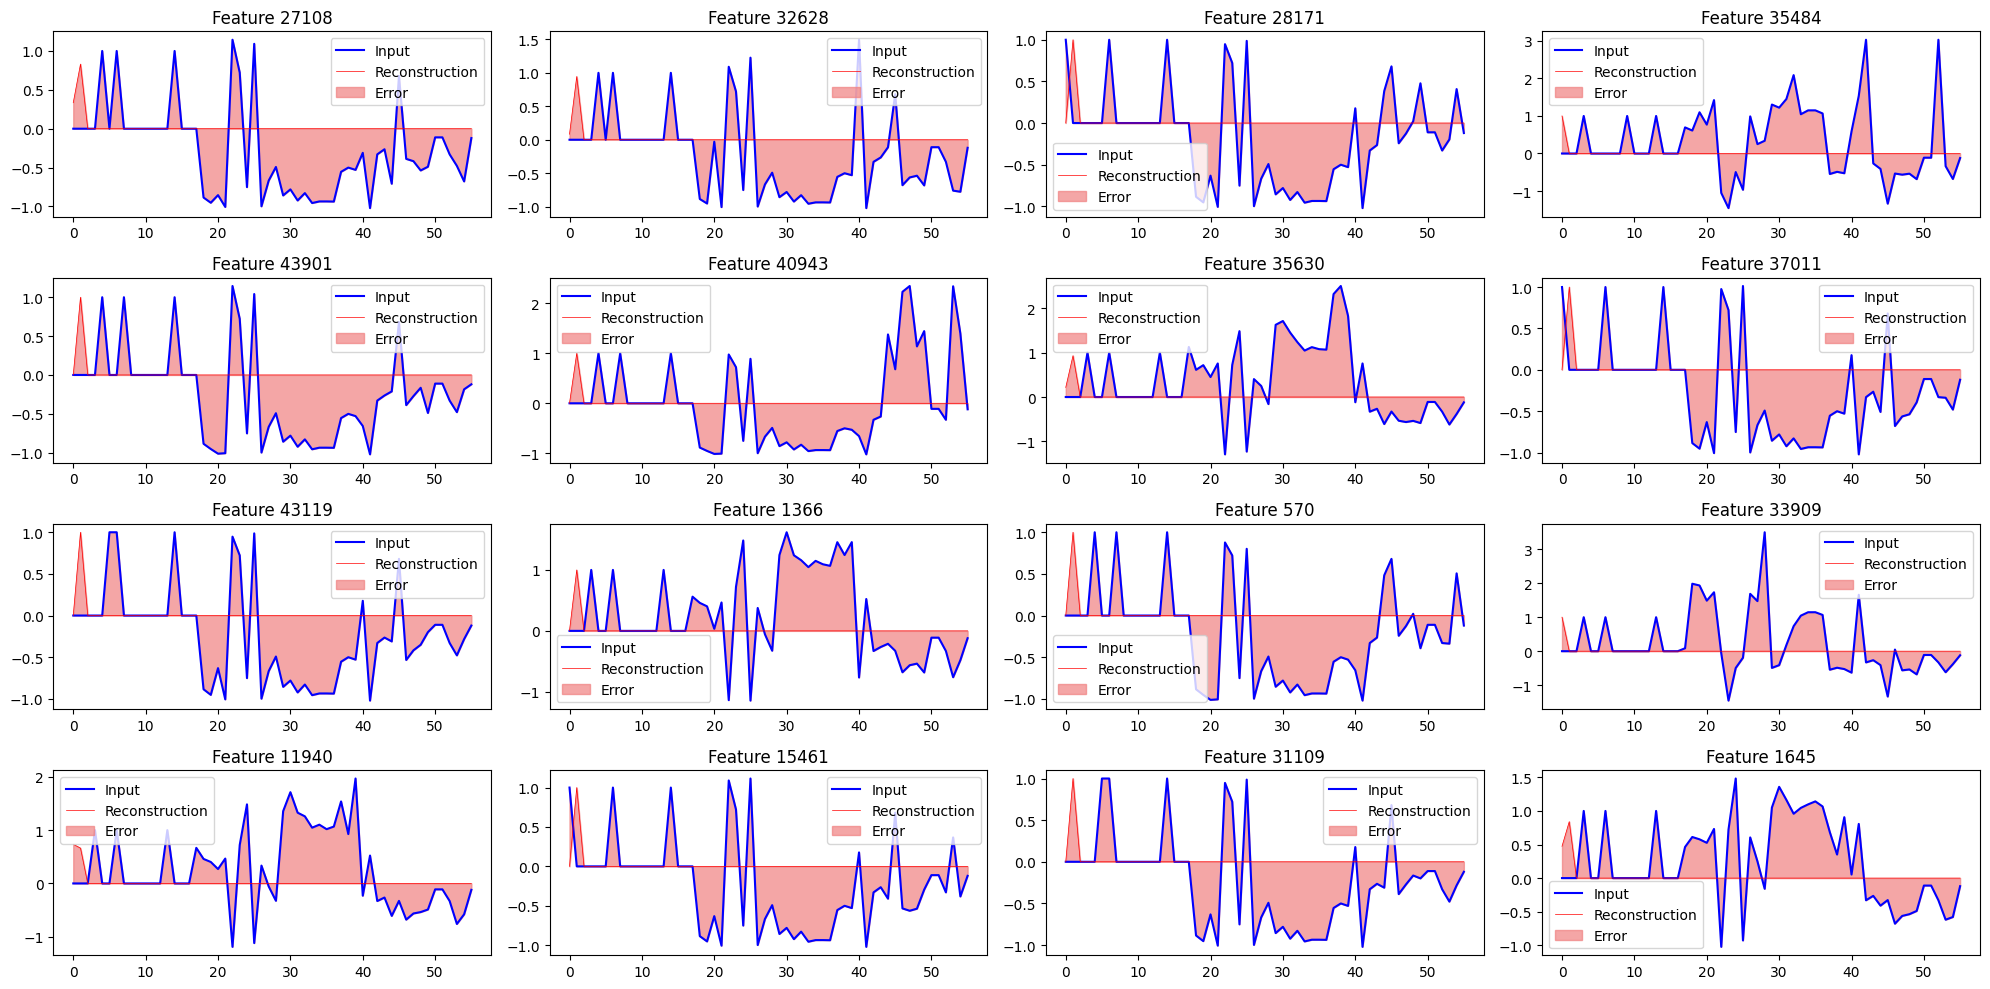

In [ ]:
total_subplots = 16
selected_features = random.sample(range(X_test_reshaped.shape[0]), total_subplots)

plt.figure(figsize=(20, 10))
for idx, feature_idx in enumerate(selected_features):
    plt.subplot(4, 4, idx + 1)
    plt.plot(X_test_reshaped[idx, 0], 'b')
    plt.plot(decoded_data[idx, 0], 'r', linewidth=0.5)
    plt.fill_between(np.arange(TOTAL_FEATURES), decoded_data[idx, 0], X_test_reshaped[idx, 0], color='lightcoral', alpha=0.7)
    plt.title(f'Feature {feature_idx + 1}')
    plt.legend(labels=["Input", "Reconstruction", "Error"])

plt.tight_layout()
plt.show()

1611/1611 [==============================] - 4s 3ms/step


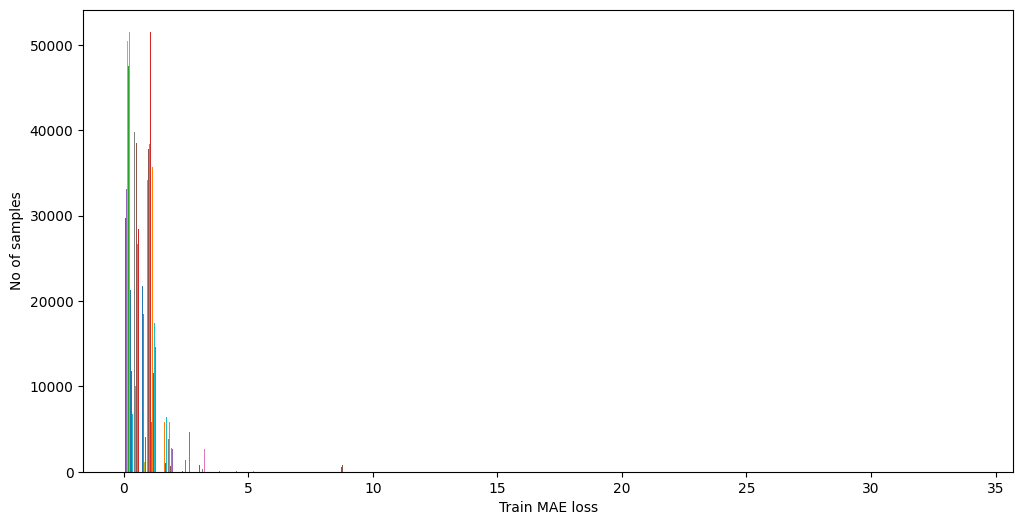

In [ ]:
# Get train MAE loss.
fig, ax = plt.subplots(figsize=(12, 6))
reconstructions = model_autoencoder.predict(X_test_reshaped)
train_mae_loss = np.mean(np.abs(reconstructions - X_test_reshaped), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

#### 4.2.4.2 Anomaly detection (can be ignored)

In [ ]:
threshold= (np.mean(train_mae_loss))
print("Threshold: ", threshold)

Threshold:  0.6077982449313792


1611/1611 [==============================] - 4s 2ms/step


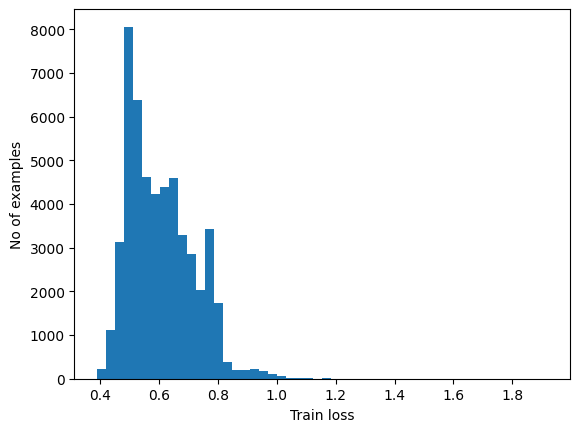

In [ ]:
reconstructions = model_autoencoder.predict(X_test_reshaped)
test_loss = tf.keras.losses.mae(reconstructions, X_test_reshaped)

test_loss_reduced = tf.reshape(test_loss, [test_loss.shape[0], -1])

plt.hist(test_loss_reduced.numpy(), bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# Variant 1 
threshold = (np.mean(test_loss) + np.std(test_loss))
print("Threshold: ", threshold)

Threshold:  0.720621394723361


In [ ]:
# Variant 2: Calculates the maximum threshold -> Variant 1. is better 
mean_loss = np.mean(test_mae_loss)
std_loss = np.std(test_mae_loss)

threshold_max = mean_loss + 1 * std_loss

# Variant 3: Calculates the percentile value of the maximum threshold -> Variant 1. is better 
quantile_value = np.percentile(test_mae_loss, q=75)
threshold_quant = quantile_value
print(threshold_max, threshold_quant)

1.2246633515494363


In [ ]:
reconstructions = model_autoencoder.predict(X_test_reshaped)

test_mae_loss = np.mean(np.abs(reconstructions - X_test_reshaped), axis=1)

predictions = np.mean((test_loss > threshold_quant).astype(int), axis=1)
average_anomaly_scores = (test_loss < 0.72).numpy().astype(int)
accuracy = accuracy_score(y_test, average_anomaly_scores)
print("Accuracy =", accuracy)

[1.         1.         1.         ... 1.         0.76785714 1.        ]


In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(model_autoencoder, X_test_reshaped, threshold)
print_stats(preds, y_test)

Accuracy = 0.6390802367323178
Precision = 0.6390802367323178
Recall = 1.0


### 4.2.5 Autoencoder with conv

In [182]:
#model_autoencoder_test.build(input_shape=(None, 1, 56)) # for debugging

x:  (None, 1, 56)
Shape nach Encoder: (None, 1, 128)
Shape nach Decoder: (None, 1, 56)


In [ ]:
# Best model ConvolutionalAutoencoder_6
class ConvolutionalAnomalyDetector(Model):
    def __init__(self, name="ConvolutionalAnomalyDetector"):
        super(ConvolutionalAnomalyDetector, self).__init__(name=name)
        self.encoder = tf.keras.Sequential([
            layers.Dense(256, activation='relu')],
            name="encoder")
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Conv1DTranspose(filters=TOTAL_FEATURES, kernel_size=3, activation='sigmoid', padding='same')],
            name="decoder")

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model_conv_autoencoder = ConvolutionalAnomalyDetector(name="ConvolutionalAutoencoder_6")
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_conv_autoencoder.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [249]:
class ConvolutionalAnomalyDetector(Model):
    def __init__(self, name="ConvolutionalAnomalyDetector"):
        super(ConvolutionalAnomalyDetector, self).__init__(name=name)
        self.encoder = tf.keras.Sequential([
            layers.Conv1D(filters=32, kernel_size=7, padding="same", activation="relu"),
            layers.Dropout(rate=0.2),
            layers.Conv1D(filters=16, kernel_size=7, padding="same", activation="relu"),
            layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", activation="relu"),
            layers.Dropout(rate=0.2)],
            name="encoder")
        
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", activation="relu"),
            layers.Conv1DTranspose(filters=TOTAL_FEATURES, kernel_size=3, activation='sigmoid', padding='same')],
            name="decoder")

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model_conv_autoencoder = ConvolutionalAnomalyDetector(name="ConvolutionalAutoencoder_9")
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_conv_autoencoder.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [161]:
model_autoencoder_conv = keras.Sequential(
    [
        layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ],
    name="ConvolutionalAutoencoder_4"
)
opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model_autoencoder_conv.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [250]:
start = time.time()
history = model_conv_autoencoder.fit(X_train_reshaped, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2) # Training model
end_train = time.time()
accuracy, recall, precision, f1, end_predict = evaluate_model(model_conv_autoencoder, X_test_reshaped, y_test, True) # Testing model

Epoch 1/200
207/207 - 19s - loss: 1.2653 - accuracy: 0.6714 - 19s/epoch - 93ms/step
Epoch 2/200
207/207 - 7s - loss: 0.2942 - accuracy: 0.8693 - 7s/epoch - 32ms/step
Epoch 3/200
207/207 - 12s - loss: 0.2065 - accuracy: 0.8982 - 12s/epoch - 57ms/step
Epoch 4/200
207/207 - 11s - loss: 0.1875 - accuracy: 0.9037 - 11s/epoch - 55ms/step
Epoch 5/200
207/207 - 7s - loss: 0.1779 - accuracy: 0.9081 - 7s/epoch - 34ms/step
Epoch 6/200
207/207 - 3s - loss: 0.1718 - accuracy: 0.9119 - 3s/epoch - 15ms/step
Epoch 7/200
207/207 - 14s - loss: 0.1672 - accuracy: 0.9152 - 14s/epoch - 65ms/step
Epoch 8/200
207/207 - 5s - loss: 0.1640 - accuracy: 0.9174 - 5s/epoch - 26ms/step
Epoch 9/200
207/207 - 4s - loss: 0.1612 - accuracy: 0.9191 - 4s/epoch - 18ms/step
Epoch 10/200
207/207 - 5s - loss: 0.1581 - accuracy: 0.9216 - 5s/epoch - 25ms/step
Epoch 11/200
207/207 - 3s - loss: 0.1566 - accuracy: 0.9226 - 3s/epoch - 13ms/step
Epoch 12/200
207/207 - 13s - loss: 0.1544 - accuracy: 0.9238 - 13s/epoch - 63ms/step
Epo

In [251]:
results = append_model_reults(model_conv_autoencoder, results, end_train - start, end_predict - end_train, accuracy, recall, precision, f1)

1611/1611 [==============================] - 2s 1ms/step


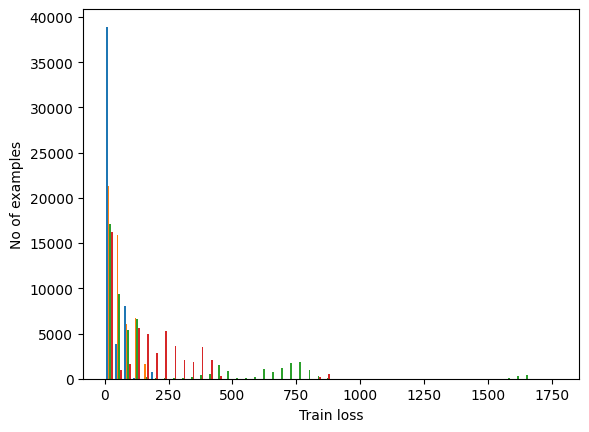

In [64]:
reconstructions = model_autoencoder_conv.predict(X_test_reshaped)
test_loss = tf.keras.losses.mae(reconstructions, X_test_reshaped)

test_loss_reduced = tf.reshape(test_loss, [test_loss.shape[0], -1])

plt.hist(test_loss_reduced.numpy(), bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

6442/6442 [==============================] - 10s 2ms/step


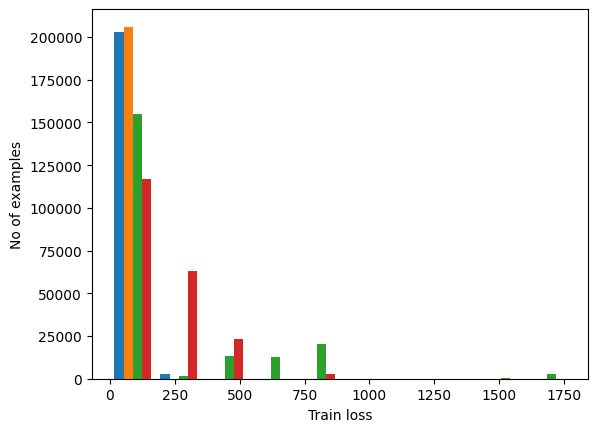

In [103]:
reconstructions = model_autoencoder_conv.predict(X_train_reshaped)
train_loss = tf.keras.losses.mae(reconstructions, X_train_reshaped)

train_loss_reduced = tf.reshape(train_loss, [train_loss.shape[0], -1])

plt.hist(train_loss_reduced.numpy(), bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

1611/1611 [==============================] - 2s 1ms/step


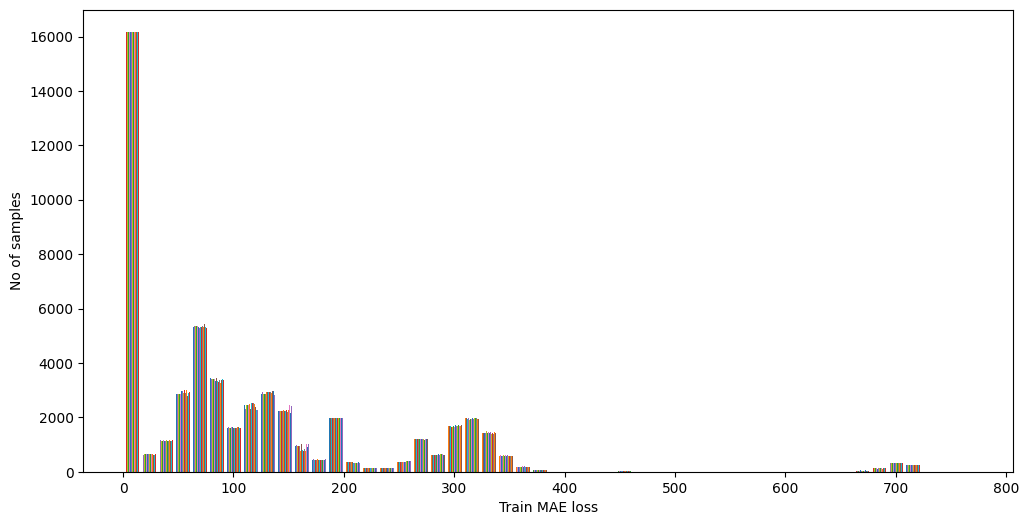

In [98]:
# Get train MAE loss.
fig, ax = plt.subplots(figsize=(12, 6))
reconstructions = model_autoencoder_conv.predict(X_test_reshaped)
train_mae_loss = np.mean(np.abs(reconstructions - X_test_reshaped), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

In [101]:
# Variant 1 
threshold_test = (np.mean(test_loss) + np.std(test_loss))
threshold_train = (np.mean(train_loss) + np.std(train_loss))

print("Training threshold: {train:.2f}\nTest threshold: {test:.2f}".format(train=threshold_train, test=threshold_test))

Training threshold: 305.02
Test threshold: 304.90


In [107]:
predictions_final = np.where(np.mean((test_loss < threshold_test).numpy().astype(int), axis=1) < 1, 0, 1)

average_anomaly_scores = (test_loss < threshold).numpy().astype(int)
accuracy = accuracy_score(y_test, predictions_final)
print("Accuracy =", accuracy)

1611/1611 [==============================] - 3s 2ms/step
Accuracy = 0.872707868438925


In [ ]:
# Extrahiere den Encoder-Teil des Modells
encoder_model = keras.Sequential(model_autoencoder_conv.layers[:-3])

# Extrahiere den Decoder-Teil des Modells
decoder_model = keras.Sequential(model_autoencoder_conv.layers[-3:])

# Verwende den Encoder, um die Daten zu codieren
encoded_data = encoder_model.predict(X_test_reshaped)

# Verwende den Decoder, um die Daten zu decodieren
decoded_data = decoder_model.predict(encoded_data)

## 5. Evaluation of all models

In [ ]:
df_results_deep = pd.DataFrame(results)
df_results_deep.to_csv('./data/df_results_d.csv', index=False)

In [ ]:
# Lösche Einträge an den Indizes 3 und 4
if len(results) > 27:  # Stelle sicher, dass genügend Einträge vorhanden sind
    results.pop(3)
else:
    print("Die Liste enthält weniger als 5 Einträge. Kann nicht entfernen.")


In [ ]:
df_results_c = pd.read_csv('./data/df_results_k.csv')
df_results_d = pd.read_csv('./data/df_results_d.csv')

In [ ]:
df_results_all = pd.concat([df_results_c, df_results_d], ignore_index=True)

In [ ]:
df_results_d.style.background_gradient(subset=['Trainingszeit'], cmap='RdYlGn_r') \
                            .background_gradient(subset=['Vorhersagezeit'], cmap='RdYlGn_r') \
                            .background_gradient(subset=['Recall'], cmap='RdYlGn') \
                            .background_gradient(subset=['Precision'], cmap='RdYlGn') \
                            .background_gradient(subset=['F1 Score'], cmap='RdYlGn') \
                            .background_gradient(subset=['Genauigkeit'], cmap='RdYlGn') \
                            .format({'Trainingszeit': '{:.2f}s', 'Vorhersagezeit': '{:.3f}s', 'Recall': '{:.2%}'
                                     , 'Precision': '{:.2%}', 'F1 Score': '{:.2%}', 'Genauigkeit': '{:.2%}'})

,Modell,Parameter,Trainingszeit,Vorhersagezeit,Genauigkeit,Recall,Precision,F1 Score
0,LSTM,nan,342.48s,12.024s,91.21%,91.21%,91.71%,91.30%
1,LSTM_2,nan,330.48s,7.235s,91.90%,91.90%,92.26%,91.97%
2,LSTM_3,nan,312.50s,7.393s,94.37%,94.37%,94.42%,94.38%
3,GRU_2,nan,273.02s,5.995s,94.40%,94.40%,94.45%,94.42%
4,GRU_1,nan,268.05s,6.357s,94.19%,94.19%,94.19%,94.19%
5,GRU_3,nan,255.39s,5.973s,94.45%,94.45%,94.45%,94.45%
6,Autoencoder_1,nan,182.45s,5.397s,93.85%,93.85%,93.90%,93.87%
7,Autoencoder_2,nan,212.89s,6.440s,93.92%,93.92%,93.96%,93.94%
8,Autoencoder_3,nan,197.89s,5.292s,94.10%,94.10%,94.25%,94.13%
9,Autoencoder_4,nan,231.92s,6.714s,94.09%,94.09%,94.14%,94.11%


In [ ]:
df_results = df_results.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
accuracy_plot = sns.barplot(x='Model', y='Accuracy', hue='Model', data=df_results, palette=sns.color_palette("RdYlGn", n_colors=len(df_results))[::-1])
plt.title('Accuracy')

for i, p in enumerate(accuracy_plot.patches):
    accuracy_plot.annotate(f'{df_results["Accuracy"].values[i]:.3f}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')


sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("RdYlGn"))
sm.set_array(df_results['Accuracy'])
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())
cbar.set_label('Accuracy')

plt.show()

In [ ]:
df_results = df_results.sort_values(by='Training Time', ascending=False)

plt.figure(figsize=(10, 6))
accuracy_plot = sns.barplot(x='Model', y='Training Time', hue='Model', data=df_results, palette=sns.color_palette("RdYlGn", n_colors=len(df_results)))
plt.title('Benötigte Trainingszeit ')
plt.yscale('log')
plt.ylabel('Logarithmische Trainingszeit')
for i, p in enumerate(accuracy_plot.patches):
    accuracy_plot.annotate(f'{df_results["Training Time"].values[i]:.3f} s', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')


sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("RdYlGn").reversed())
sm.set_array(df_results['Training Time'])
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())
cbar.set_label('Trainingszeit')
plt.show()

In [ ]:
df_results = df_results.sort_values(by='Prediction Time', ascending=False)

plt.figure(figsize=(10, 6))
accuracy_plot = sns.barplot(x='Model', y='Prediction Time', data=df_results, palette=sns.color_palette("RdYlGn", n_colors=len(df_results)))
plt.title('Dauer bis Vorhersage')
plt.yscale('log')
for i, p in enumerate(accuracy_plot.patches):
    accuracy_plot.annotate(f'{df_results["Prediction Time"].values[i]:.3f} s', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')
   


sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("RdYlGn").reversed())
sm.set_array(df_results['Prediction Time'])
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())
plt.show()